# 1. Import Library

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import statsmodels.api as sm

# 2. Data Loading & Splitting

In [3]:
# Load dataset
df = pd.read_csv('real_estate.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [4]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6,391,19.2,12.01,21.8
1,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5,398,15.2,5.10,37.0
2,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7,330,19.1,9.52,24.5
3,4.89822,0.0,18.10,0.0,0.631,4.970,NaN,1.3325,24,666,20.2,3.26,50.0
4,NaN,0.0,18.10,NaN,0.655,5.759,48.2,3.0665,24,666,20.2,14.13,19.9


In [5]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    486 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [6]:
# Size of Dataset
R = df.shape[0]
C = df.shape[1]
print(f"Number of rows: {R}")
print(f"Number of columns: {C}")

Number of rows: 506
Number of columns: 13


In [7]:
# Get testing data
df_test = df.iloc[:R//5, :]
df_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6,391,19.2,12.01,21.8
1,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5,398,15.2,5.10,37.0
2,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7,330,19.1,9.52,24.5
3,4.89822,0.0,18.10,0.0,0.631,4.970,NaN,1.3325,24,666,20.2,3.26,50.0
4,NaN,0.0,18.10,NaN,0.655,5.759,48.2,3.0665,24,666,20.2,14.13,19.9


In [8]:
# Display the shape
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 101
Number of columns: 13


In [9]:
# Get training data
df_train = df.iloc[R//5:, :]
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
101,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1,315,16.4,9.25,20.9
102,0.05735,0.0,4.49,0.0,0.449,6.630,56.1,4.4377,3,247,18.5,6.53,26.6
103,0.05561,70.0,2.24,0.0,0.400,7.041,10.0,7.8278,5,358,14.8,4.74,29.0
104,0.19802,0.0,10.59,0.0,0.489,6.182,NaN,3.9454,4,277,18.6,9.47,25.0
105,7.40389,0.0,18.10,0.0,0.597,5.617,97.9,1.4547,24,666,20.2,26.40,17.2


In [10]:
# Display the shape
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 405
Number of columns: 13


# 3. EDA & Data Preprocessing

### 3.1 Training Data

In [11]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 405
Number of columns: 13


In [12]:
# # Drop unnecessary columns
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['rank'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [13]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [14]:
# Check for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 101 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     389 non-null    float64
 1   ZN       389 non-null    float64
 2   INDUS    387 non-null    float64
 3   CHAS     389 non-null    float64
 4   NOX      405 non-null    float64
 5   RM       405 non-null    float64
 6   AGE      388 non-null    float64
 7   DIS      405 non-null    float64
 8   RAD      405 non-null    int64  
 9   TAX      405 non-null    int64  
 10  PTRATIO  405 non-null    float64
 11  LSTAT    389 non-null    float64
 12  MEDV     405 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 41.3 KB


In [15]:
# Remove row with missing values
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     312 non-null    float64
 1   ZN       312 non-null    float64
 2   INDUS    312 non-null    float64
 3   CHAS     312 non-null    float64
 4   NOX      312 non-null    float64
 5   RM       312 non-null    float64
 6   AGE      312 non-null    float64
 7   DIS      312 non-null    float64
 8   RAD      312 non-null    int64  
 9   TAX      312 non-null    int64  
 10  PTRATIO  312 non-null    float64
 11  LSTAT    312 non-null    float64
 12  MEDV     312 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 31.8 KB


In [16]:
# # Rename columns
# headers = ["Petrol tax", "Average income", "Paved highways",
#            "Population driver licence (%)", "Petrol consumption"]
# df_train.columns = headers
# df_train.columns

In [17]:
# Drop duplicated rows
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])

Number of duplicated rows: 0

Removing duplicates...

Number of duplicated rows: 0


In [ ]:
# Check invalid datatypes
df_train.info()

In [18]:
# # Change the data type of invalid columns
# df_train["trip_distance"] = df_train["trip_distance"].astype(int)

In [19]:
# Show unique values on each X's columns
X = df_train.drop(['MEDV'], axis=1)

print(f"Number of rows: {X.shape[0]}\n")

for col in X.columns:
    print(X[col].value_counts())

Number of rows: 312

CRIM
0.03548     1
5.20177     1
51.13580    1
0.04417     1
2.37934     1
           ..
0.95577     1
0.79041     1
0.84054     1
0.10793     1
0.08221     1
Name: count, Length: 312, dtype: int64
ZN
0.0      231
20.0      16
25.0       8
22.0       6
80.0       6
12.5       5
40.0       4
60.0       3
90.0       3
30.0       3
70.0       3
45.0       3
33.0       3
35.0       2
21.0       2
82.5       2
85.0       2
52.5       2
95.0       2
55.0       2
17.5       1
100.0      1
18.0       1
75.0       1
Name: count, dtype: int64
INDUS
18.10    78
8.14     19
19.58    16
6.20     11
3.97     10
         ..
6.06      1
1.89      1
2.93      1
1.22      1
2.95      1
Name: count, Length: 66, dtype: int64
CHAS
0.0    293
1.0     19
Name: count, dtype: int64
NOX
0.5380    20
0.8710     9
0.6240     9
0.6930     9
0.7130     9
          ..
0.4040     1
0.4290     1
0.4379     1
0.5180     1
0.4990     1
Name: count, Length: 75, dtype: int64
RM
6.127    3
7.185    2
6

In [20]:
# # Drop poor features (to avoid overfitting)
# df_train = df_train.drop(['VendorID'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['payment_type'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [21]:
# Show unique values on y's column
y = df_train['MEDV']

print(f"Number of rows: {y.shape[0]}\n")

print(y.value_counts())

Number of rows: 312

MEDV
50.0    8
21.7    5
23.9    5
22.0    4
19.6    4
       ..
25.3    1
21.5    1
14.8    1
22.1    1
24.5    1
Name: count, Length: 178, dtype: int64


<Axes: >

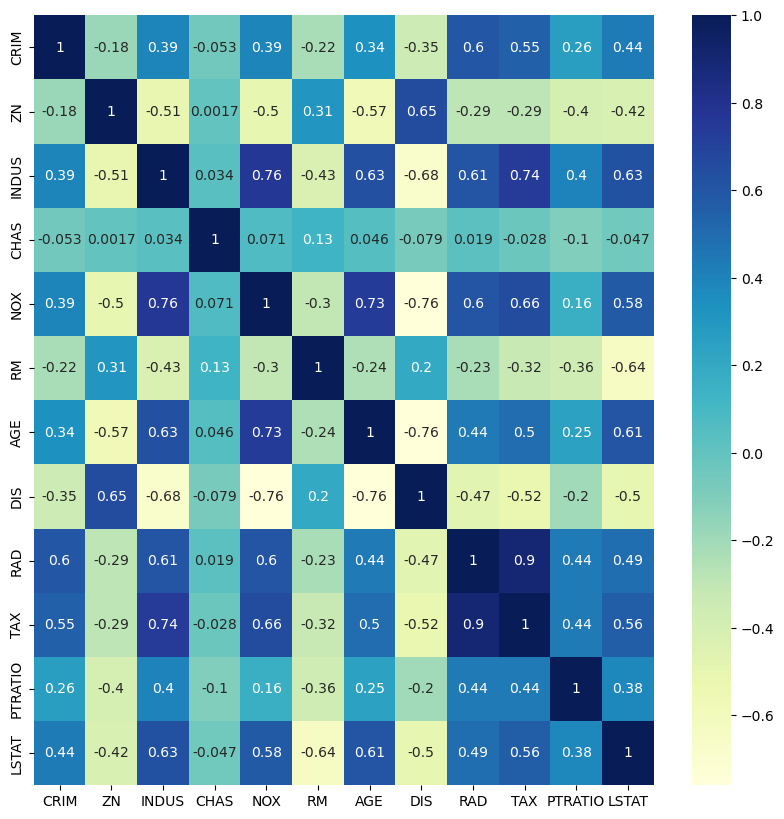

In [22]:
# Displaying heatmap
X = df_train.drop(['MEDV'], axis=1)

plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(method="pearson"), cmap="YlGnBu", annot=True)

In [23]:
# # Drop correlated features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

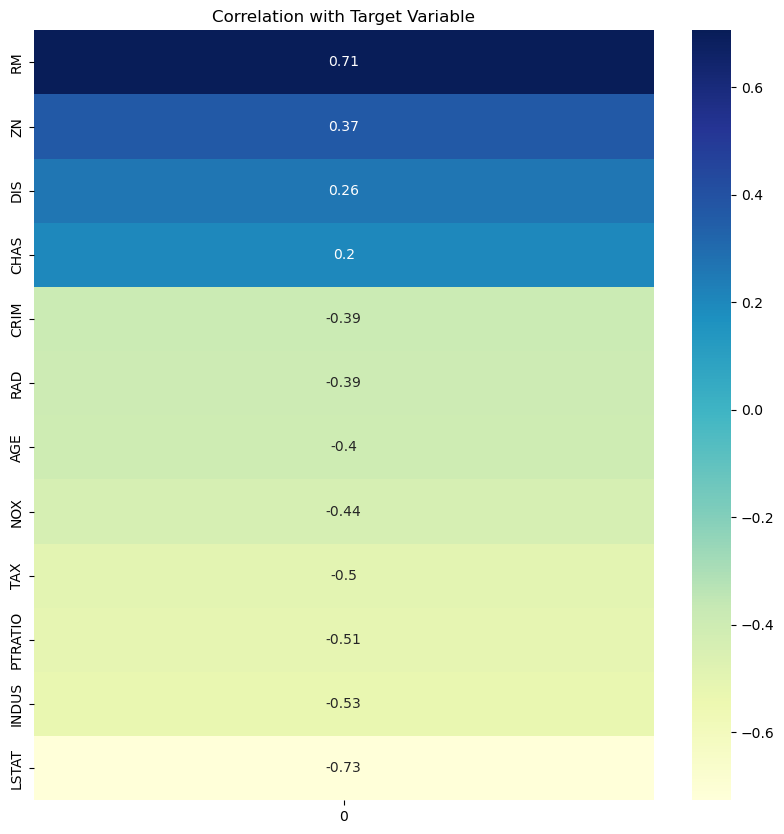

In [24]:
# Create a correlation matrix with target variable
X = df_train.drop(['MEDV'], axis=1)
y = df_train['MEDV']

corr_with_target = X.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='YlGnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

In [25]:
# # Drop unimportant features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [26]:
# Show categorical columns
categorical_cols = list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))

print("Categorical columns:")
print(sorted(categorical_cols))

Categorical columns:
[]


In [27]:
# # Show unique values in categorical columns
# unique_values = []

# for col in categorical_cols:
#     unique_value = [col]
#     unique_value.append(", ".join(df_train[col].unique()))
#     unique_values.append(unique_value)

# pd.DataFrame(unique_values, columns=["col", "unique values"])

In [28]:
# # Encode categorical columns using OrdinalEncoder

# enc_maps = {
#     "buying price" : [{'col': "buying price", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "maintenance cost" : [{'col': "maintenance cost", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "number of doors" : [{'col': "number of doors", 'mapping': {"2": 0, "3": 1, "4": 2, "more": 3}}],
#     "number of persons" : [{'col': "number of persons", 'mapping': {"2": 0, "4": 1, "more": 2}}],
#     "luggage boot" : [{'col': "luggage boot", 'mapping': {"small": 0, "medium": 1, "big": 2}}],
#     "safety" : [{'col': "safety", 'mapping': {"low": 0, "medium": 1, "high": 2}}],
#     "decision" : [{'col': "decision", 'mapping': {"unaccepted": 0, "accepted": 1, "good": 2, "very good": 3}}]
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_train = enc.fit_transform(df_train)


# df_train

**Important**: We detect outliers BEFORE creating polynomial features because:
1. Polynomial features amplify outliers exponentially (outlier² creates extreme values)
2. One outlier affects multiple polynomial features simultaneously  
3. This prevents model instability in polynomial regression

Do it when the data is sufficient

In [29]:
# Show all numerical columns
numerical_columns = list(df_train.select_dtypes(include=[np.number]).columns.values)
numerical_columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [30]:
# Detect outliers
def detect_outliers_iqr(df, column):    
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

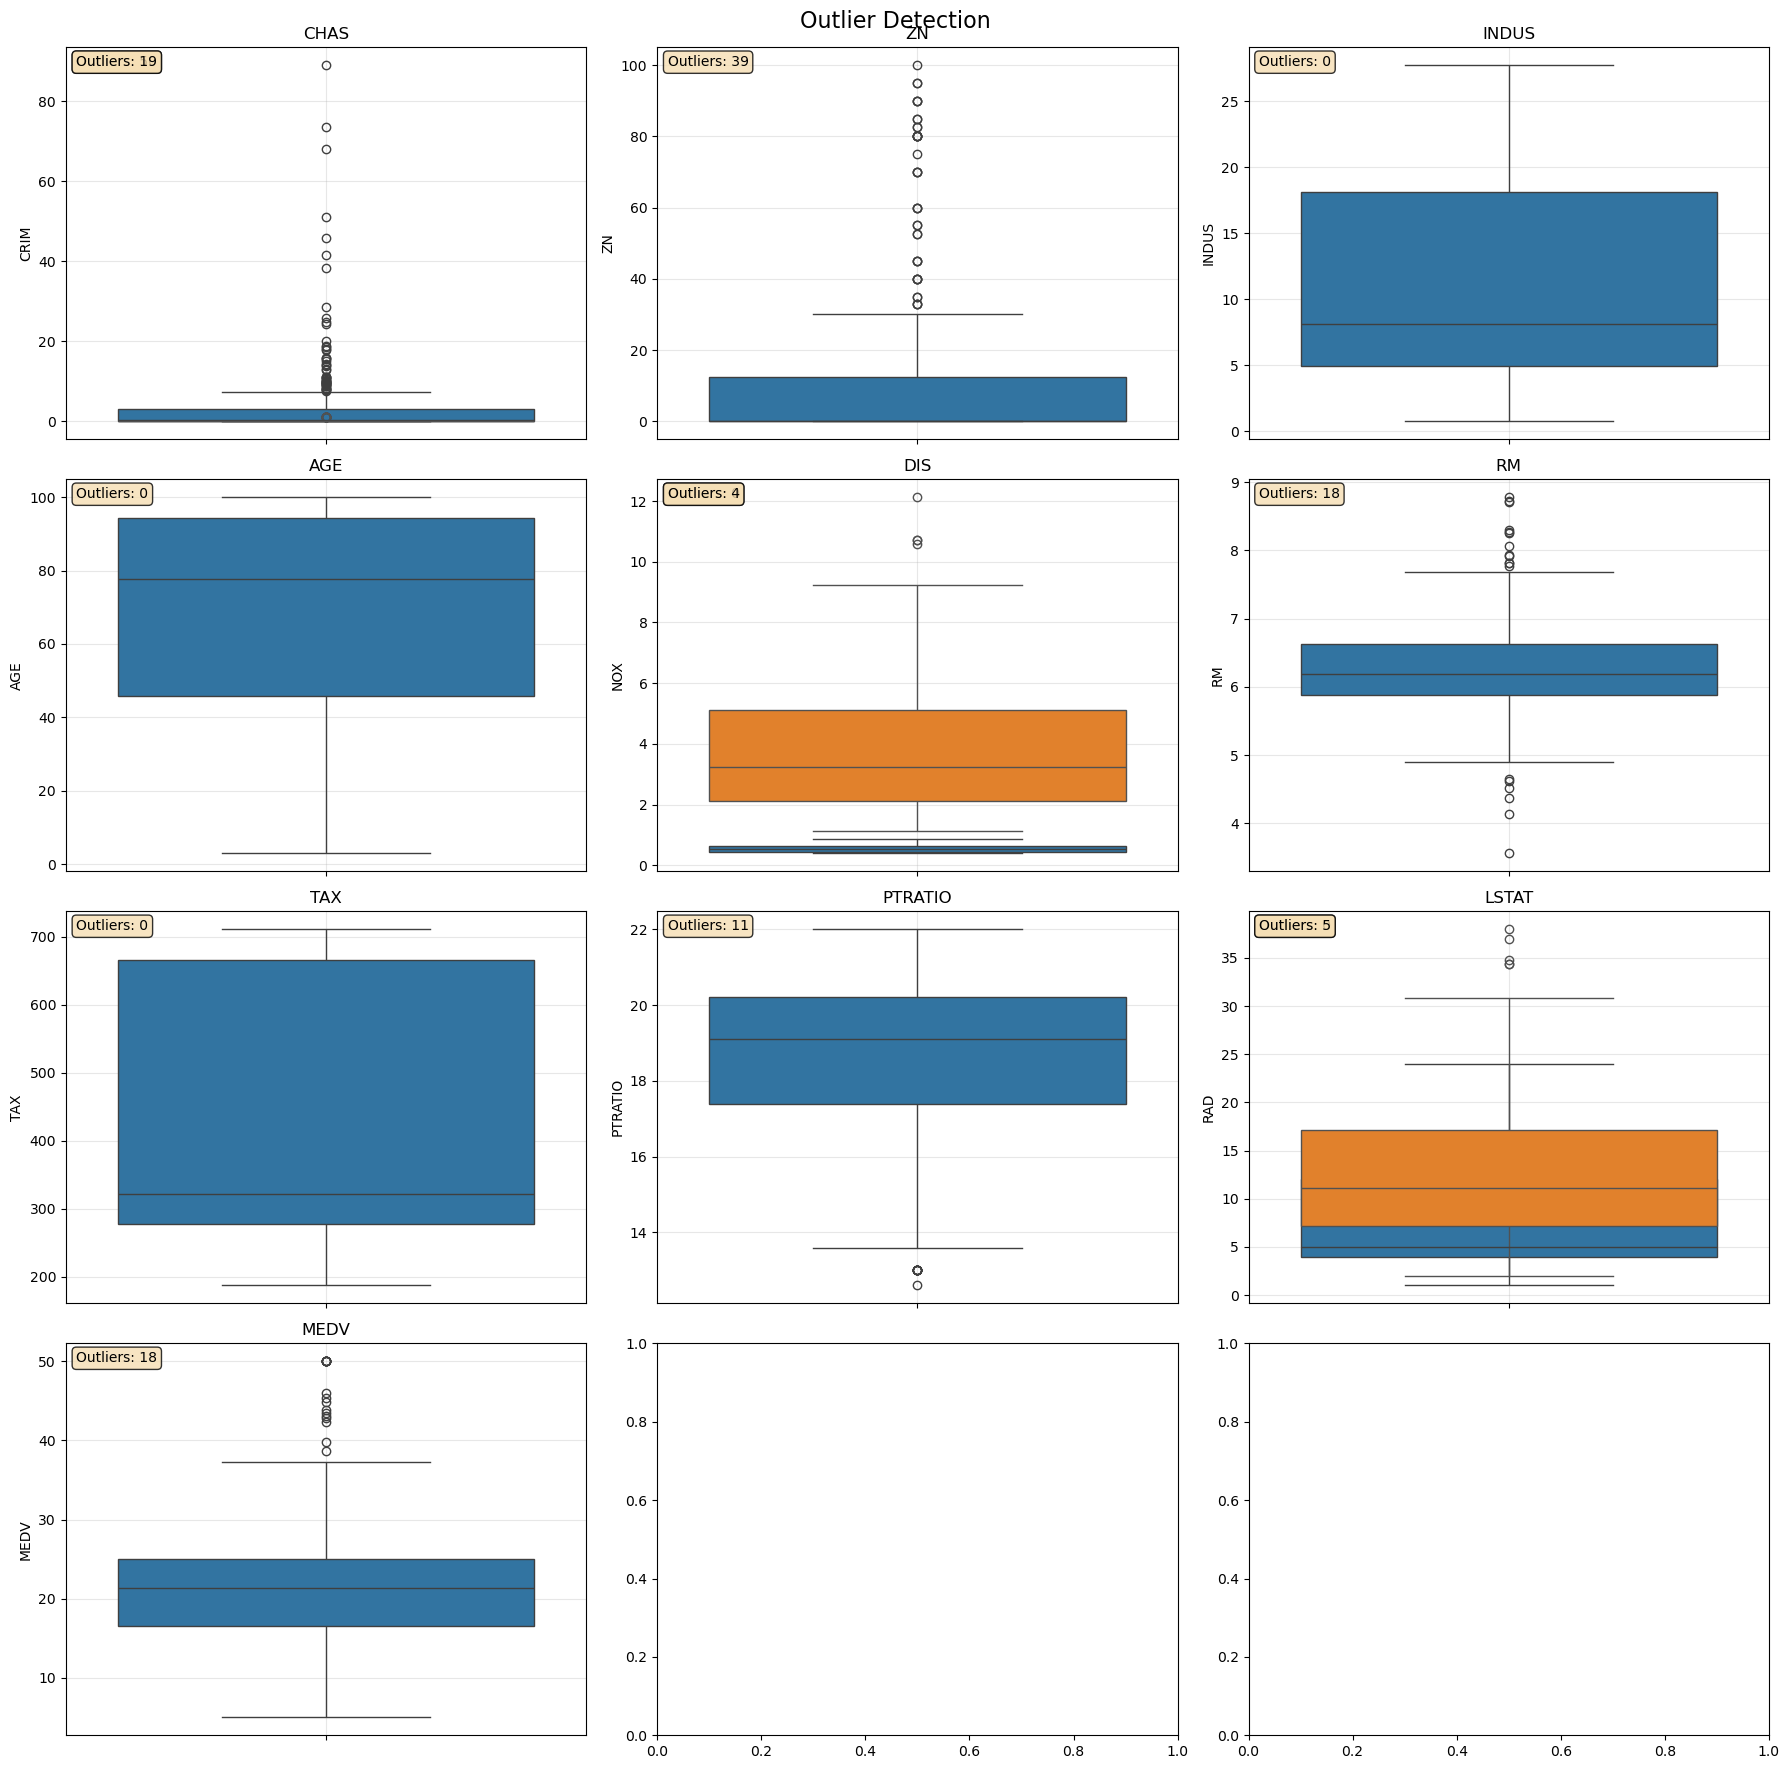

In [31]:
# Create box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(4, 3, figsize=(18, 18))
fig.suptitle('Outlier Detection', fontsize=16)

lower_bounds = dict()
upper_bounds = dict()

for i, col in enumerate(numerical_columns):
    row = i // 4
    col_idx = i % 3
    
    # Create box plot
    sns.boxplot(data=df_train, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add outlier count as text
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound
    
    axes[row, col_idx].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [32]:
# # Remove outliers based on IQR method (only if the dataset is big enough)
# for i, col in enumerate(numerical_columns):
    
#     df_train = df_train[df_train[col] >= lower_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
#     df_train = df_train[df_train[col] <= upper_bounds[col]]
#     df_train = df_train.reset_index(drop=True)

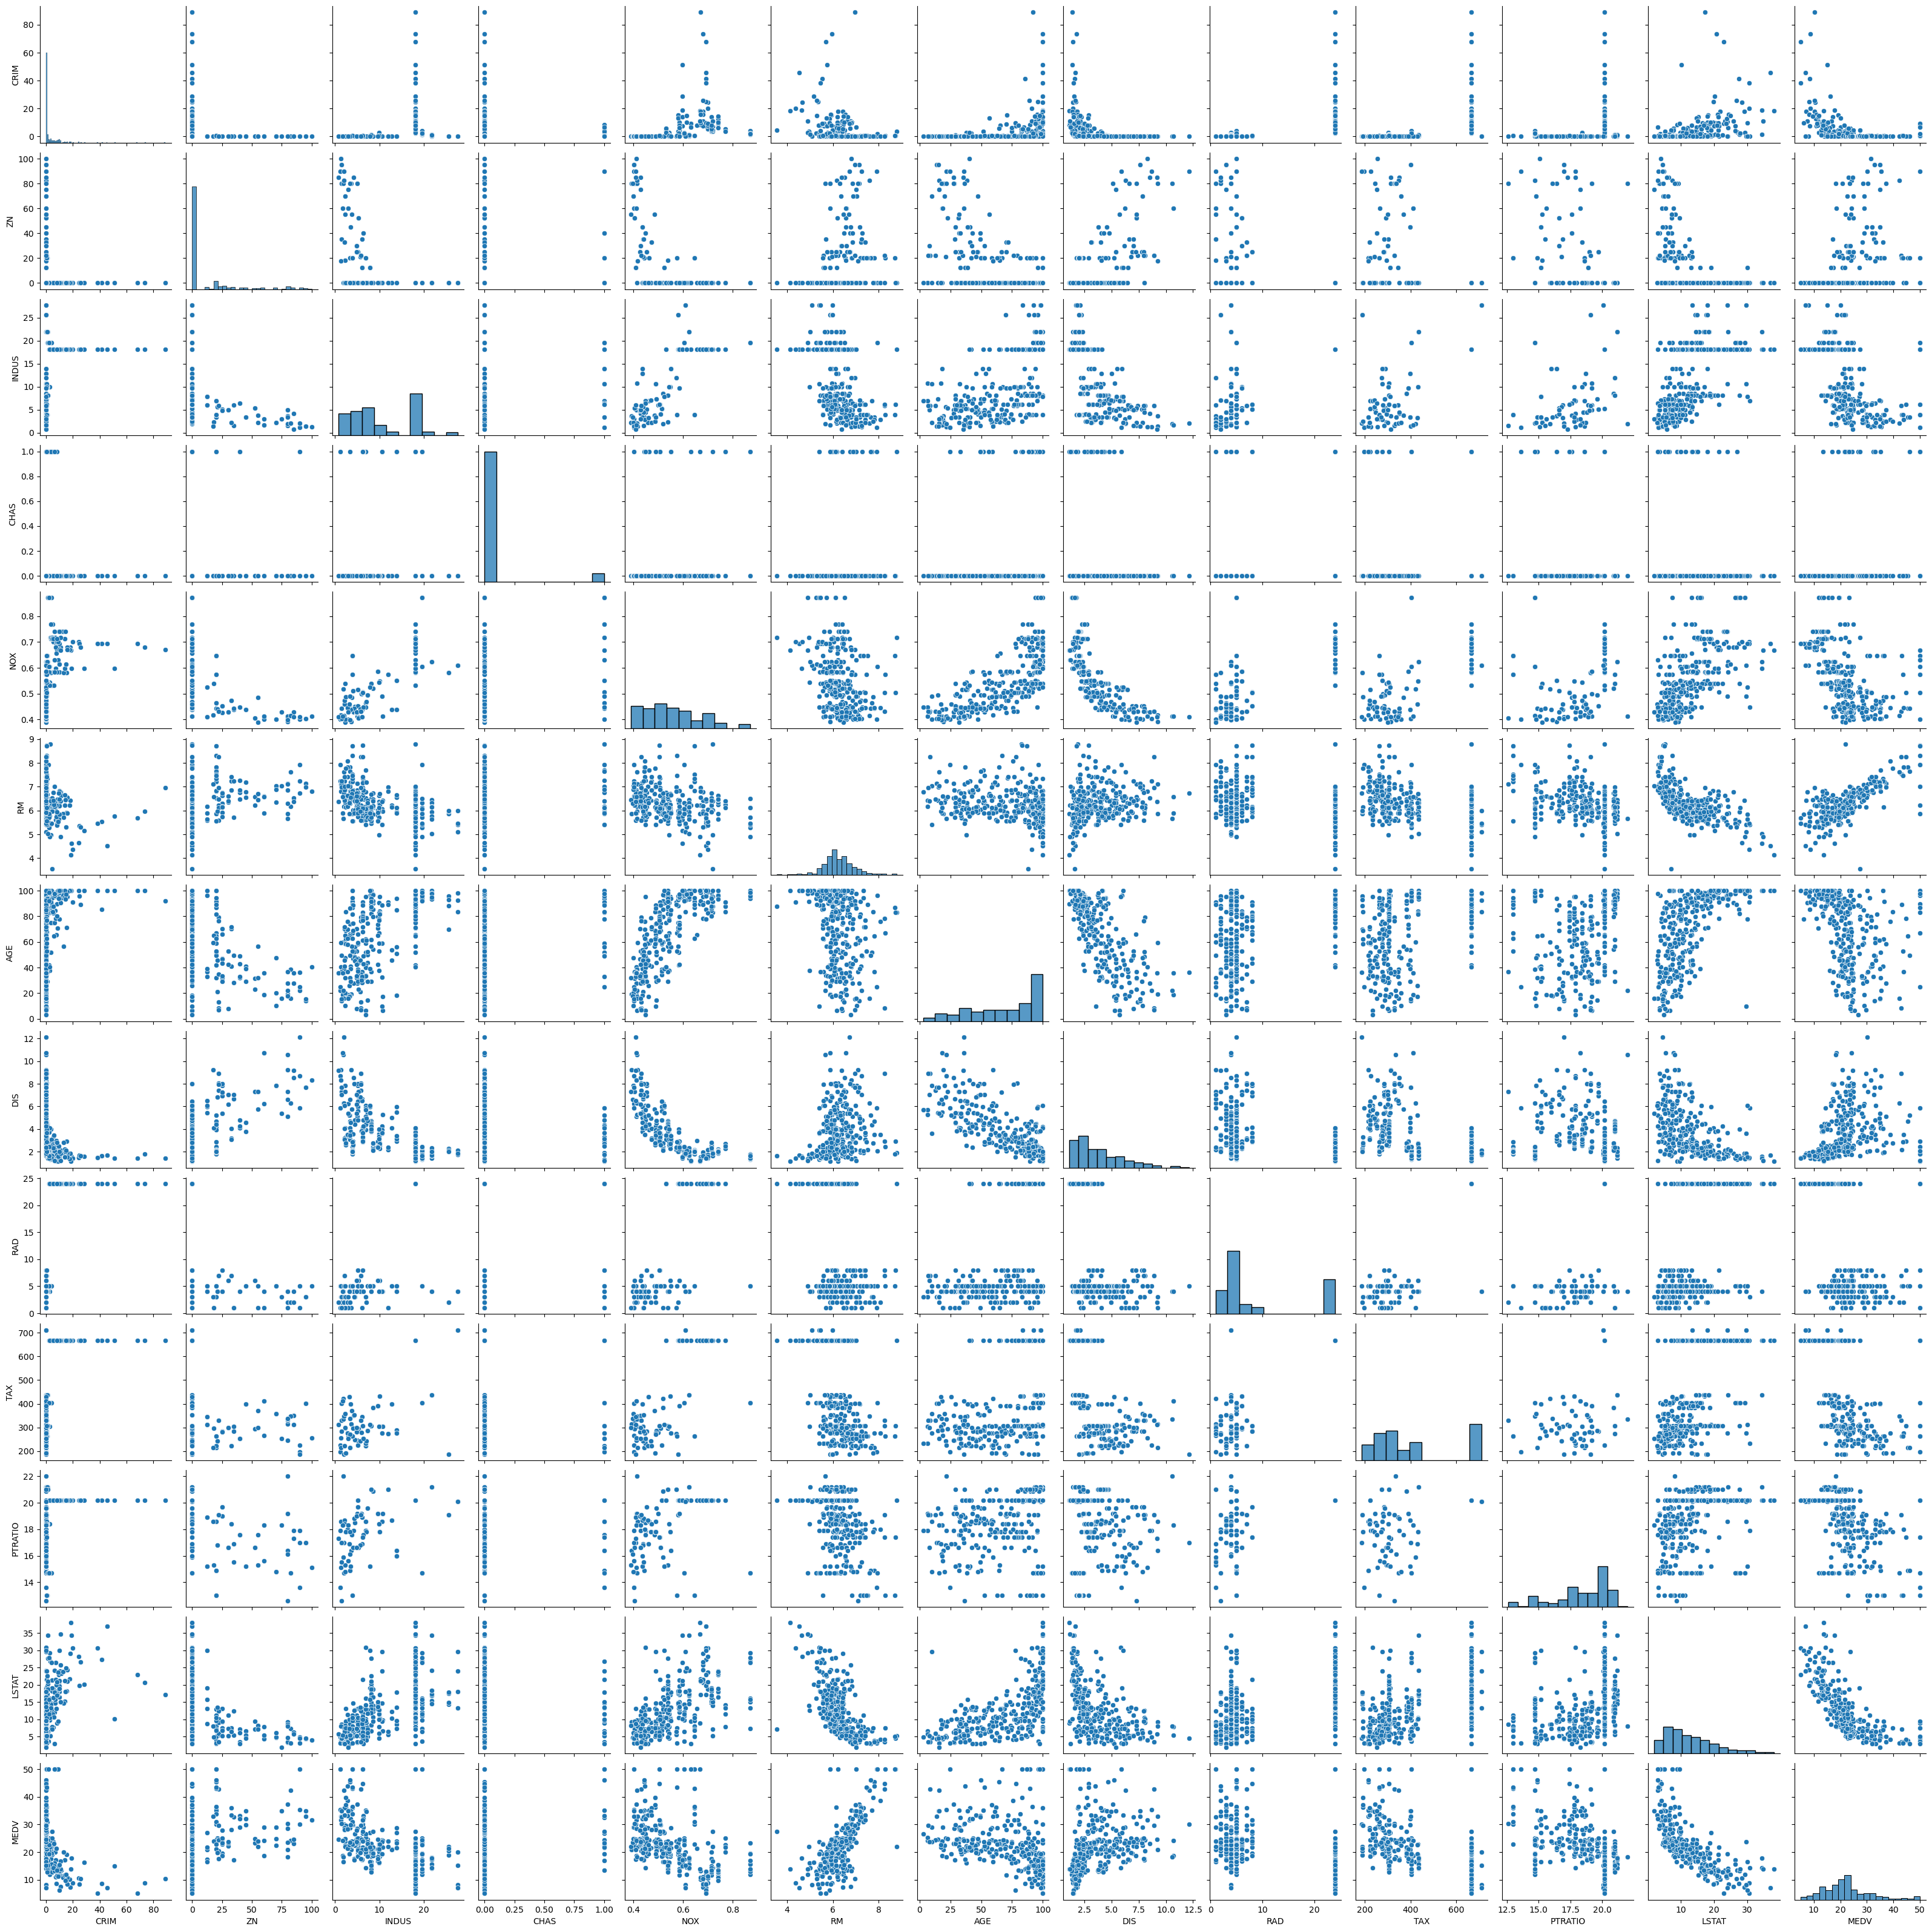

In [33]:
# Show the distribution of all columns
sns.pairplot(df_train)

In [34]:
# Show statistical information of the dataset
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,3.867213,10.900641,10.745256,0.060897,0.552547,6.277933,68.892949,3.817729,9.301282,403.288462,18.503205,12.779423,22.286859
std,9.932989,22.817353,6.914597,0.239526,0.113068,0.709973,27.879929,2.142078,8.613098,168.452499,2.176443,7.337319,8.943283
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.980000,5.000000
25%,0.079710,0.000000,4.930000,0.000000,0.449000,5.879750,45.775000,2.105350,4.000000,277.000000,17.400000,7.170000,16.575000
50%,0.286735,0.000000,8.140000,0.000000,0.538000,6.185000,77.700000,3.239250,5.000000,322.000000,19.100000,11.160000,21.300000
75%,3.023262,12.500000,18.100000,0.000000,0.624000,6.626000,94.325000,5.104475,12.000000,666.000000,20.200000,17.130000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [35]:
# Separate features and labels
y_train = df_train['MEDV']
X_train = df_train.drop(['MEDV'], axis=1)

In [36]:
# # MinMax Scaling
# numeric_cols = X_train.select_dtypes(include='number').columns

# scaler_X = MinMaxScaler()
# scaler_Y = MinMaxScaler()

# X_train[numeric_cols] = scaler_X.fit_transform(X_train[numeric_cols])
# y_train = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# pd.DataFrame(y_train, columns=['tip_amount'])

### 3.2 Testing Data

In [37]:
# Size of Dataset
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 101
Number of columns: 13


In [38]:
# # Drop unnecessary columns
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test = df_test.drop(['rank'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [39]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [40]:
# Remove row with missing values
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     82 non-null     float64
 1   ZN       82 non-null     float64
 2   INDUS    82 non-null     float64
 3   CHAS     82 non-null     float64
 4   NOX      82 non-null     float64
 5   RM       82 non-null     float64
 6   AGE      82 non-null     float64
 7   DIS      82 non-null     float64
 8   RAD      82 non-null     int64  
 9   TAX      82 non-null     int64  
 10  PTRATIO  82 non-null     float64
 11  LSTAT    82 non-null     float64
 12  MEDV     82 non-null     float64
dtypes: float64(11), int64(2)
memory usage: 8.5 KB


In [41]:
# # Rename columns
# headers = ["Petrol tax", "Average income", "Paved highways",
#            "Population driver licence (%)", "Petrol consumption"]
# df_test.columns = headers
# df_test.columns

In [ ]:
# # Change the data type of invalid columns
# df_test["Target class"] = df_test["Target class"].astype("int64")
# df_test.info()

In [43]:
# # Drop poor features (to avoid overfitting)
# df_test = df_test.drop(['VendorID'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test = df_test.drop(['payment_type'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [44]:
# # Drop correlated features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [45]:
# # Drop unimportant features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [42]:
# # Encode categorical columns using OrdinalEncoder

# enc_maps = {
#     "buying price" : [{'col': "buying price", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "maintenance cost" : [{'col': "maintenance cost", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "number of doors" : [{'col': "number of doors", 'mapping': {"2": 0, "3": 1, "4": 2, "more": 3}}],
#     "number of persons" : [{'col': "number of persons", 'mapping': {"2": 0, "4": 1, "more": 2}}],
#     "luggage boot" : [{'col': "luggage boot", 'mapping': {"small": 0, "medium": 1, "big": 2}}],
#     "safety" : [{'col': "safety", 'mapping': {"low": 0, "medium": 1, "high": 2}}],
#     "decision" : [{'col': "decision", 'mapping': {"unaccepted": 0, "accepted": 1, "good": 2, "very good": 3}}]
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_train = enc.fit_transform(df_train)


# df_train

In [46]:
# Separate features and labels
y_test = df_test['MEDV']
X_test = df_test.drop(['MEDV'], axis=1)

In [47]:
# # MinMax Scaling
# numeric_cols = X_test.select_dtypes(include='number').columns

# X_test[numeric_cols] = scaler_X.transform(X_test[numeric_cols])
# y_test = scaler_Y.transform(y_test.values.reshape(-1, 1)).flatten()
# pd.DataFrame(y_test, columns=['tip_amount'])

# 4. Regression Tree

In [48]:
model = DecisionTreeRegressor(criterion = 'squared_error', random_state=42)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
model.get_params()

In [49]:
# Evaluate the model

residual_df = None

def evaluate_model(model, X_test, y_test):    
    y_pred = model.predict(X_test)
    # y_pred = scaler_Y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    # y_test = scaler_Y.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    global residual_df
    residual_df = pd.DataFrame({'Y_Test': y_test, 'Y_Pred': y_pred, 'Residuals':(y_test-y_pred) }).head(5)
    
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)
    rmse = math.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, y_pred)
    print("R^2:", r2)

print("Regression Tree")
evaluate_model(model, X_test, y_test)

Regression Tree
MAE: 2.251219512195122
MSE: 8.402439024390244
RMSE: 2.898696090381026
R^2: 0.913551143607375


In [50]:
residual_df

,Y_Test,Y_Pred,Residuals
0,21.8,21.8,0.0
1,37.0,28.0,9.0
2,24.5,24.1,0.4
3,15.0,18.7,-3.7
4,19.9,19.1,0.8


# 5. Tuning